**CNN Tensorflow Keras With Dropout**

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
from dataclasses import dataclass

In [ ]:
SEED_VALUE = 42
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [ ]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


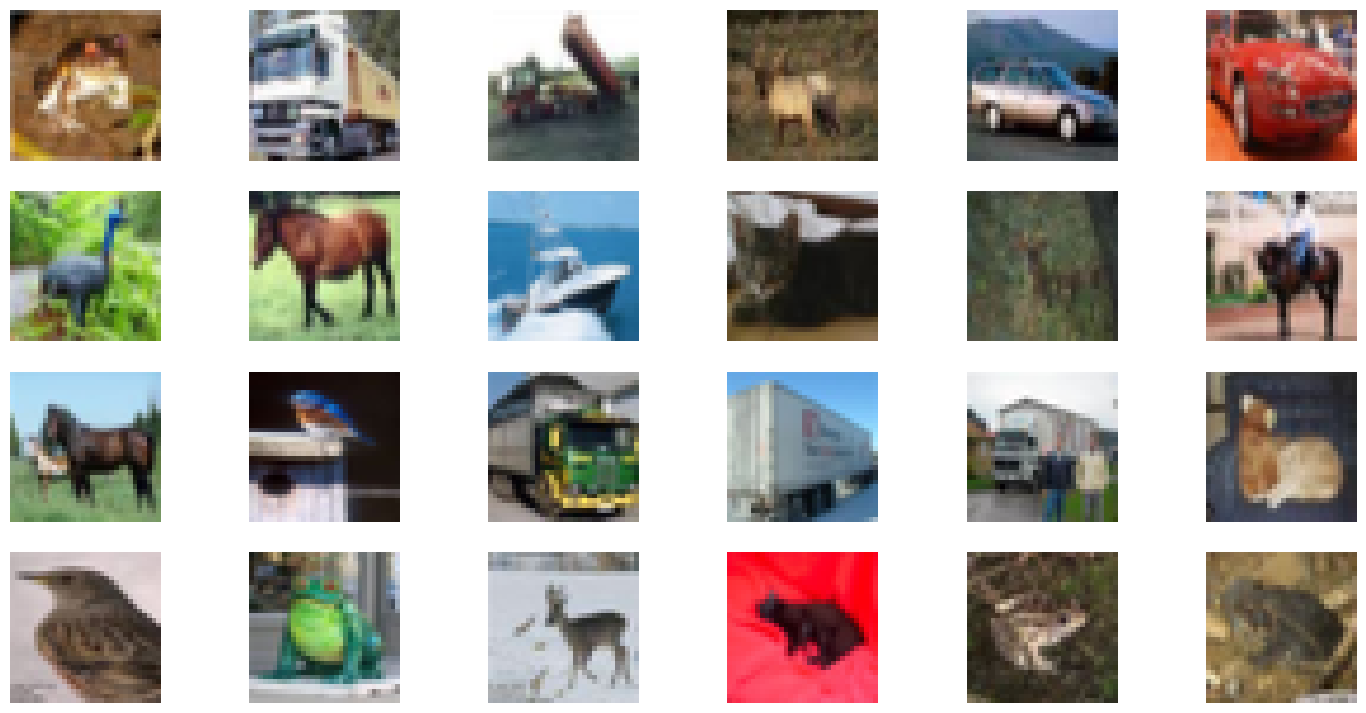

In [ ]:
plt.figure(figsize=(18,9))
num_rows = 4
num_cols = 6
for i in range(num_rows * num_cols):
  ax = plt.subplot(num_rows, num_cols, i+1)
  plt.imshow(X_train[i,:,:])
  plt.axis("off")

In [ ]:
X_train = X_train.astype("float32") / 255
X_text = X_test.astype("float32") / 255
print("Original label for the 1st training sample:", y_train[0])
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print("After conversion of categorical value", y_train[0])

Original label for the 1st training sample: [6]
After conversion of categorical value [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
@dataclass(frozen =True)
class DatasetConfig:
  NUM_CLASSES: int = 10
  IMG_HEIGHT: int = 32
  IMG_WIDTH:  int = 32
  NUM_CHANNELS: int = 3

@dataclass(frozen =True)
class TrainingConfig:
  EPOCHS: int = 40
  BATCH_SIZE: int=256
  LEARNING_RATE: float = 0.001

In [ ]:

def cnn_model(input_shape=(32, 32, 3)):
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
    model.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
    model.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation="softmax"))

    return model


In [ ]:
model = cnn_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [ ]:
model.compile(optimizer="rmsprop", loss= "categorical_crossentropy", metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size = TrainingConfig.BATCH_SIZE, epochs = TrainingConfig.EPOCHS,
                    verbose = 1, validation_split = .3,)

Epoch 1/40
137/137 [==============================] - 17s 38ms/step - loss: 2.1144 - accuracy: 0.2213 - val_loss: 1.9376 - val_accuracy: 0.2878
Epoch 2/40
137/137 [==============================] - 4s 29ms/step - loss: 1.8069 - accuracy: 0.3338 - val_loss: 1.6582 - val_accuracy: 0.3847
Epoch 3/40
137/137 [==============================] - 4s 31ms/step - loss: 1.6108 - accuracy: 0.4077 - val_loss: 1.4459 - val_accuracy: 0.4775
Epoch 4/40
137/137 [==============================] - 4s 31ms/step - loss: 1.4783 - accuracy: 0.4574 - val_loss: 1.5431 - val_accuracy: 0.4442
Epoch 5/40
137/137 [==============================] - 4s 31ms/step - loss: 1.3876 - accuracy: 0.4964 - val_loss: 1.3379 - val_accuracy: 0.5205
Epoch 6/40
137/137 [==============================] - 4s 31ms/step - loss: 1.2817 - accuracy: 0.5353 - val_loss: 1.3460 - val_accuracy: 0.5162
Epoch 7/40
137/137 [==============================] - 4s 31ms/step - loss: 1.1849 - accuracy: 0.5736 - val_loss: 1.0885 - val_accuracy: 0.606

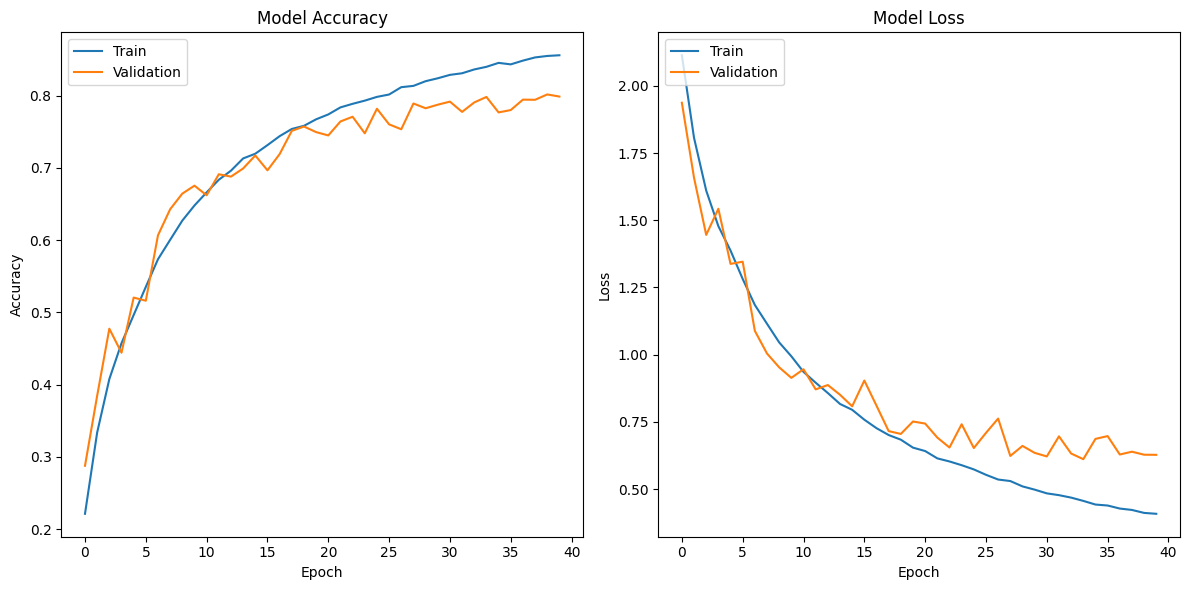

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()